# Performance sobre distintos relaciones de aspecto

## Generando los casos de prueba 

In [1]:
!rm -r resize/converted
!mkdir -p resize/converted
x = 0
pixels = 360000
width = 4
height = pixels//width

while(height > 8):
    res = f'{width}x{height}'
    print("Generando imagen con resolución:"+res)
    !convert resize/2001ASpaceOdyssey.bmp -resize {res}! resize/converted/{res}.bmp
    width *= 2
    height = pixels//width

Generando imagen con resolución:4x90000
Generando imagen con resolución:8x45000
Generando imagen con resolución:16x22500
Generando imagen con resolución:32x11250
Generando imagen con resolución:64x5625
Generando imagen con resolución:128x2812
Generando imagen con resolución:256x1406
Generando imagen con resolución:512x703
Generando imagen con resolución:1024x351
Generando imagen con resolución:2048x175
Generando imagen con resolución:4096x87
Generando imagen con resolución:8192x43
Generando imagen con resolución:16384x21
Generando imagen con resolución:32768x10


## Obteniendo la performance de cada uno

In [43]:
from os import listdir, remove
from os.path import isfile, join
mypath = 'resize/converted'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.sort(key=lambda x : int(x.split('x')[0]))
print(onlyfiles)
nombres = []
ciclos = []
sds = []
filters = ['ImagenFantasma','ColorBordes','PixeladoDiferencial', 'ReforzarBrillo']
filterUsed = filters[0] #FILTRO A USAR

for nameFile in onlyfiles:
    !../build/tp2 {filterUsed} -i asm resize/converted/{nameFile} -o resize/converted/{filterUsed}_{nameFile} -l resize/log.txt -t 500
    f = open("resize/log.txt", "r")
    res = f.read().rstrip().split('\t')
    remove("resize/log.txt")
    
    name = nameFile.split('.')[0]
    w = int(name.split('x')[0])
    h = int(name.split('x')[1])
    nombres.append(w/h)
    amountPixels = w*h
    
    ciclos.append(float(res[8])/(w*h))
    sds.append(2*float(res[9])/((w*h)**2))
    print(res)


['4x90000.bmp', '8x45000.bmp', '16x22500.bmp', '32x11250.bmp', '64x5625.bmp', '128x2812.bmp', '256x1406.bmp', '512x703.bmp', '1024x351.bmp', '2048x175.bmp', '4096x87.bmp', '8192x43.bmp', '16384x21.bmp', '32768x10.bmp']
Procesando...
  Filtro             : ImagenFantasma
  Implementación     : ASM
  Archivo de entrada : resize/converted/4x90000.bmp
Tiempo de ejecución:
  Comienzo                          : 12717217379304
  Fin                               : 12719165435881
  # iteraciones                     : 500
  # de ciclos insumidos totales     : 1948056577
  # de ciclos insumidos por llamada : 3896113.250
['12717217379304', '12719165435881', '500', '1948056577', '1', 'ImagenFantasma', '90000', '4', '3896113.250', '267127.969']
Procesando...
  Filtro             : ImagenFantasma
  Implementación     : ASM
  Archivo de entrada : resize/converted/8x45000.bmp
Tiempo de ejecución:
  Comienzo                          : 12719645946108
  Fin                               : 12721534337602


## Graficando los datos

In [44]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams.update({'font.size': 13})

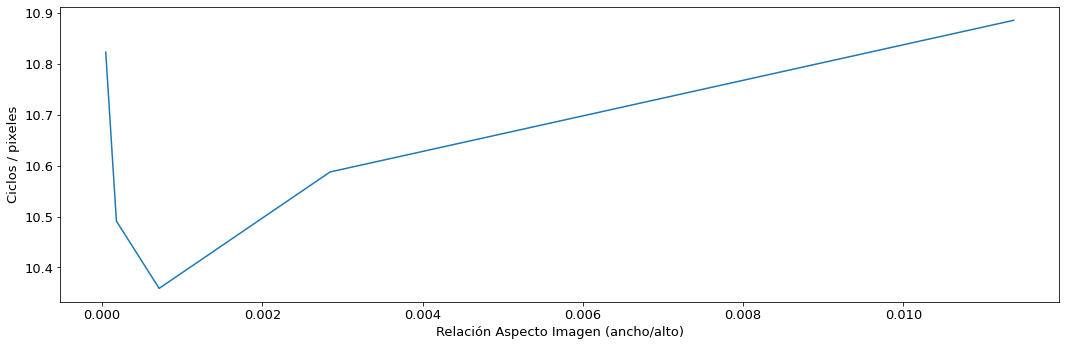

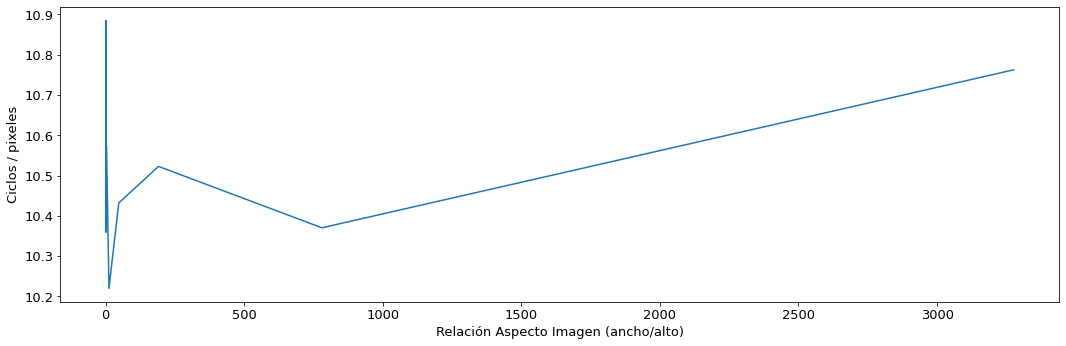

In [45]:
nombresNotacion = list(map(lambda x: '{:.3}'.format(x), nombres))
plt.errorbar(nombres[:5], ciclos[:5], yerr=sds[:5])
#plt.xticks(labelsSizes, nombresNotacion, rotation=90, fontsize=10)
plt.xlabel('Relación Aspecto Imagen (ancho/alto)')
plt.ylabel('Ciclos / pixeles')
plt.tight_layout()
plt.show()

nombresNotacion = list(map(lambda x: '{:.3}'.format(x), nombres))
plt.errorbar(nombres, ciclos, yerr=sds)
#plt.xticks(labelsSizes, nombresNotacion, rotation=90, fontsize=10)
plt.xlabel('Relación Aspecto Imagen (ancho/alto)')
plt.ylabel('Ciclos / pixeles')
plt.tight_layout()
plt.show()

In [18]:
print(nombres[:9])
print(nombres[9:])

[4.4444444444444447e-05, 0.00017777777777777779, 0.0007111111111111111, 0.0028444444444444446, 0.011377777777777778, 0.04551920341394026, 0.18207681365576103, 0.7283072546230441, 2.9173789173789175]
[11.702857142857143, 47.08045977011494, 190.51162790697674, 780.1904761904761, 3276.8]
